<a href="https://colab.research.google.com/github/nkhan054002/QuantProjects/blob/main/five_Factor_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

     |████████████████████████████████| 6.4 MB 7.3 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import statsmodels.formula.api as smf
import pandas_datareader.data as web
##ur basically using pandas_datareader package lol
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# funnily enough the following function gives the same R squared value for all tickers

In [ ]:
def abc(TICKER, start_date, end_date):
  df_five_f = web.DataReader('F-F_Research_Data_5_Factors_2x3','famafrench',start=start_date, end = end_date)
  df_five_f = df_five_f[0]
  df_five_f.index = df_five_f.index.format()
  #the above line is unnecessary

  asset = yf.download(TICKER,start=start_date,end=end_date,adjusted=True,progress=False)

  y = asset['Adj Close'].resample('M').last()
  y = y.pct_change().dropna()

  y = pd.DataFrame(y)

  y.index = y.index.strftime('%Y-%m')

  ffd = df_five_f.join(y)
  ##ffd stands for five_factor_data

  ffd.dropna(inplace = True)

  ffd.columns = ['mkt', 'smb', 'hml', 'rmw', 'cma', 'rf', 'rtn']

  ffd.loc[:, ffd.columns != 'rtn'] /= 100

  ##mayabe there is an issue with setting the start and end data in the yf.download - due to the Nan values in the first and last rows
  ##ehh lets see it
  ffd['excess_rtn'] = ffd.rtn - ffd.rf

  ffm = smf.ols(formula='excess_rtn ~ mkt + smb + hml + rmw + cma',data=ffd).fit()

  return ffm.summary()

In [ ]:
ax = abc('AAPL', '2019-09-09', '2021-01-01')
print(ax)
##printing it is much better

                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     9.053
Date:                Fri, 14 Jan 2022   Prob (F-statistic):            0.00256
Time:                        12:11:01   Log-Likelihood:                 26.735
No. Observations:                  15   AIC:                            -41.47
Df Residuals:                       9   BIC:                            -37.22
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0483      0.024      2.028      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [ ]:
def abcdef(TICKER, start_date, end_date):
  df_five_f = web.DataReader('F-F_Research_Data_5_Factors_2x3','famafrench',start=start_date, end = end_date)
  df_five_f = df_five_f[0]
  df_five_f.index = df_five_f.index.format()
  #the above line is unnecessary

  asset = yf.download(TICKER,start=start_date,end=end_date,adjusted=True,progress=False)

  y = asset['Adj Close'].resample('M').last()
  y = y.pct_change().dropna()

  y = pd.DataFrame(y)

  y.index = y.index.strftime('%Y-%m')

  ffd = df_five_f.join(y)
  ##ffd stands for five_factor_data

  ffd.dropna(inplace = True)

  ffd.columns = ['mkt', 'smb', 'hml', 'rmw', 'cma', 'rf', 'rtn']

  ffd.loc[:, ffd.columns != 'rtn'] /= 100

  ##mayabe there is an issue with setting the start and end data in the yf.download - due to the Nan values in the first and last rows
  ##ehh lets see it
  ffd['excess_rtn'] = ffd.rtn - ffd.rf

  ffd['expected_excess_rtn'] = ffd['mkt'] + ffd['smb'] + ffd['hml'] + ffd['rmw'] + ffd['cma']

  #excess_rtn ~ mkt + smb + hml + rmw + cma

  return ffd

In [ ]:
av = abcdef('AAPL','1990-09-09','2021-01-01')
av
##what is the purpose of this or capm

,mkt,smb,hml,rmw,cma,rf,rtn,excess_rtn,expected_excess_rtn
1990-10,-0.0192,-0.0507,0.0000,0.0313,-0.0032,0.0068,0.060344,0.053544,-0.0418
1990-11,0.0635,0.0004,-0.0297,0.0050,-0.0469,0.0057,0.199116,0.193416,-0.0077
1990-12,0.0246,0.0064,-0.0163,0.0264,-0.0181,0.0060,0.170069,0.164069,0.0230
1991-01,0.0469,0.0389,-0.0157,0.0126,-0.0385,0.0052,0.290697,0.285497,0.0442
1991-02,0.0719,0.0401,-0.0063,-0.0004,-0.0043,0.0048,0.033702,0.028902,0.1010
...,...,...,...,...,...,...,...,...,...
2020-08,0.0763,-0.0091,-0.0292,0.0436,-0.0132,0.0001,0.216569,0.216469,0.0684
2020-09,-0.0363,-0.0001,-0.0261,-0.0138,-0.0183,0.0001,-0.102526,-0.102626,-0.0946
2020-10,-0.0210,0.0467,0.0416,-0.0093,-0.0075,0.0001,-0.060012,-0.060112,0.0505
2020-11,0.1247,0.0701,0.0213,-0.0211,0.0138,0.0001,0.095493,0.095393,0.2088


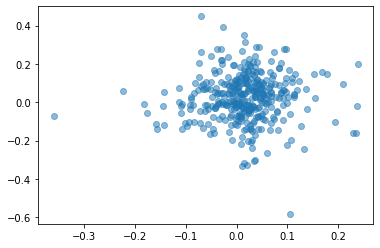

In [ ]:
plt.scatter(av['expected_excess_rtn'], av['excess_rtn'], alpha = 0.5)
##x,y format for the 'bove one
x = av['expected_excess_rtn']
y = av['excess_rtn']
m, b = np.polyfit(av['expected_excess_rtn'], av['excess_rtn'], 1)
#plt.plot(x, m*x + b)
##to try a delayed version of the actual excess returns